In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_excel('/content/timeseries_wilo.xlsx',index_col='Date ',parse_dates=True)
df.index.freq='d'


In [ ]:
df.columns

Index(['Change in COD'], dtype='object')

<Axes: xlabel='Date '>

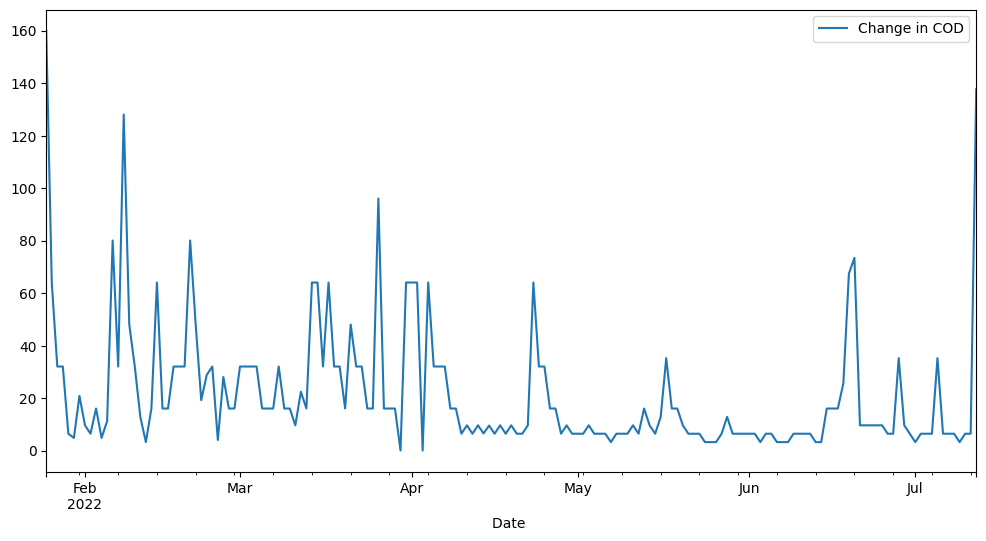

In [ ]:
df.plot(figsize=(12,6))

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

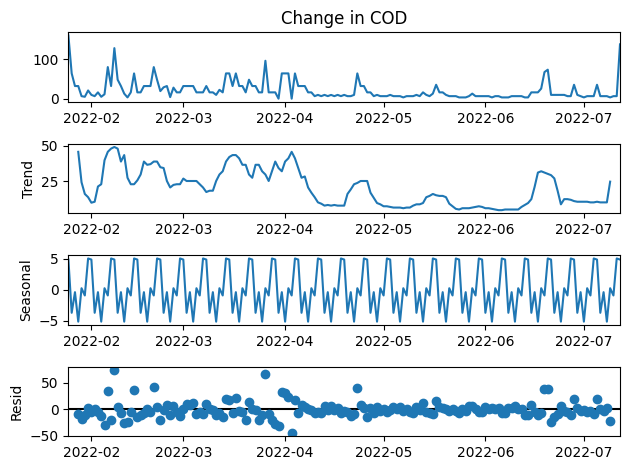

In [ ]:
results=seasonal_decompose(df['Change in COD'])
results.plot();

In [ ]:
len(df)

169

<Axes: >

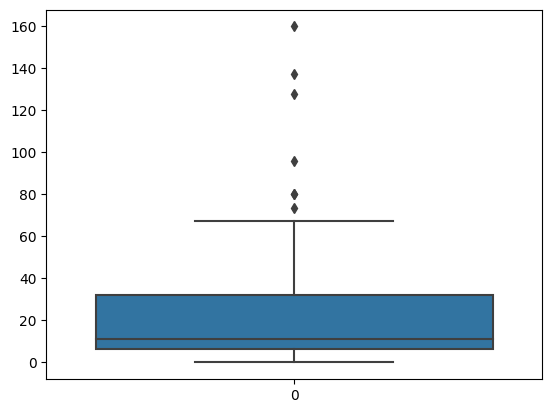

In [ ]:

# Box Plot
import seaborn as sns
sns.boxplot(df['Change in COD'])

In [ ]:
train=df.iloc[:136]
test=df.iloc[136:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [ ]:
scaler.fit(train)
scaler_train=scaler.transform(train)
scaler_test=scaler.transform(test)

In [ ]:
scaler_train[:10]

array([[1.  ],
       [0.4 ],
       [0.2 ],
       [0.2 ],
       [0.04],
       [0.03],
       [0.13],
       [0.06],
       [0.04],
       [0.1 ]])

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
#define genrator
n_input = 12
n_feature=1
generator=TimeseriesGenerator(scaler_train,scaler_train,length=n_input,batch_size=1)

In [ ]:
x,y=generator[1]
print(f'Given the Array:\n{x.flatten()}')
print(f'Predict this y:\n{y}')

Given the Array:
[0.4  0.2  0.2  0.04 0.03 0.13 0.06 0.04 0.1  0.03 0.07 0.5 ]
Predict this y:
[[0.2]]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
from keras.engine import sequential
#DEFINE MODEL
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(n_input,n_feature)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               40800     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#fit model
model.fit(generator,epochs=200)

Epoch 1/200
124/124 [==============================] - 2s 5ms/step - loss: 0.0185
Epoch 2/200
124/124 [==============================] - 0s 3ms/step - loss: 0.0170
Epoch 3/200
124/124 [==============================] - 1s 4ms/step - loss: 0.0167
Epoch 4/200
124/124 [==============================] - 0s 4ms/step - loss: 0.0167
Epoch 5/200
124/124 [==============================] - 0s 4ms/step - loss: 0.0170
Epoch 6/200
124/124 [==============================] - 0s 4ms/step - loss: 0.0168
Epoch 7/200
124/124 [==============================] - 0s 4ms/step - loss: 0.0161
Epoch 8/200
124/124 [==============================] - 0s 4ms/step - loss: 0.0162
Epoch 9/200
124/124 [==============================] - 0s 4ms/step - loss: 0.0162
Epoch 10/200
124/124 [==============================] - 0s 4ms/step - loss: 0.0155
Epoch 11/200
124/124 [==============================] - 0s 4ms/step - loss: 0.0160
Epoch 12/200
124/124 [==============================] - 1s 4ms/step - loss: 0.0158
Epoch 13/200


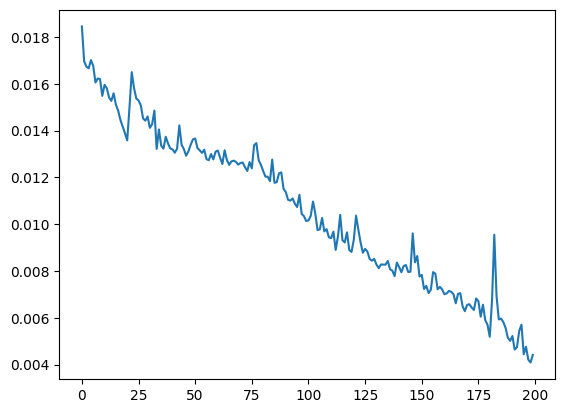

In [ ]:
loss_per_epoch=model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
last_train_batch=scaler_train[-12:]

In [ ]:
last_train_batch=last_train_batch.reshape((1,n_input,n_feature))

In [ ]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 112ms/step


array([[0.05864646]], dtype=float32)

In [ ]:
scaler_test[0]

array([0.04])

In [ ]:
test_predictions = []

first_eval_batch = scaler_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_feature))

for i in range(len(test)):

    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]

    # append the prediction into the array
    test_predictions.append(current_pred)

    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


1/1 [==============================] - 0s 21ms/step


In [ ]:

test_predictions


[array([0.05864646], dtype=float32),
 array([0.06929047], dtype=float32),
 array([0.0770435], dtype=float32),
 array([0.08173396], dtype=float32),
 array([0.08419739], dtype=float32),
 array([0.08525908], dtype=float32),
 array([0.0868977], dtype=float32),
 array([0.08860908], dtype=float32),
 array([0.08786789], dtype=float32),
 array([0.084511], dtype=float32),
 array([0.08026529], dtype=float32),
 array([0.07639751], dtype=float32),
 array([0.07226694], dtype=float32),
 array([0.06771292], dtype=float32),
 array([0.06368153], dtype=float32),
 array([0.06067192], dtype=float32),
 array([0.05865229], dtype=float32),
 array([0.05753028], dtype=float32),
 array([0.0573486], dtype=float32),
 array([0.05830533], dtype=float32),
 array([0.06030116], dtype=float32),
 array([0.0629352], dtype=float32),
 array([0.06577482], dtype=float32),
 array([0.06854009], dtype=float32),
 array([0.07100553], dtype=float32),
 array([0.07296355], dtype=float32),
 array([0.07424936], dtype=float32),
 array(

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['Prediction']=true_predictions

<ipython-input-99-caa2c9f292f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Prediction']=true_predictions


<Axes: xlabel='Date '>

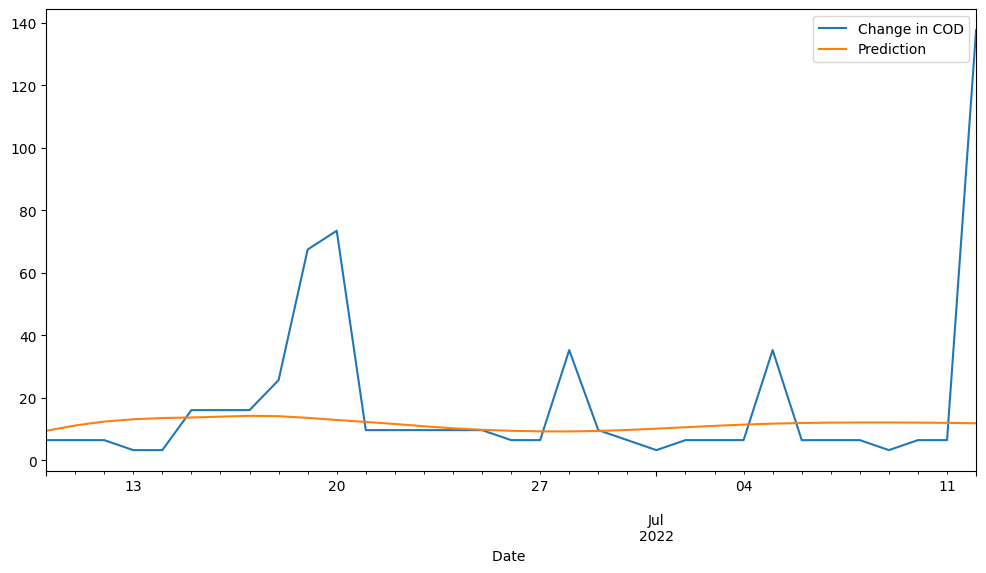

In [ ]:
test.plot(figsize=(12,6))

In [ ]:
train_predictions = []

first_eval_batch = scaler_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_feature))

for i in range(len(train)):

    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]

    # append the prediction into the array
    test_predictions.append(current_pred)

    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 16ms/step


ValueError: ignored

ValueError: ignored

<Axes: xlabel='Date '>

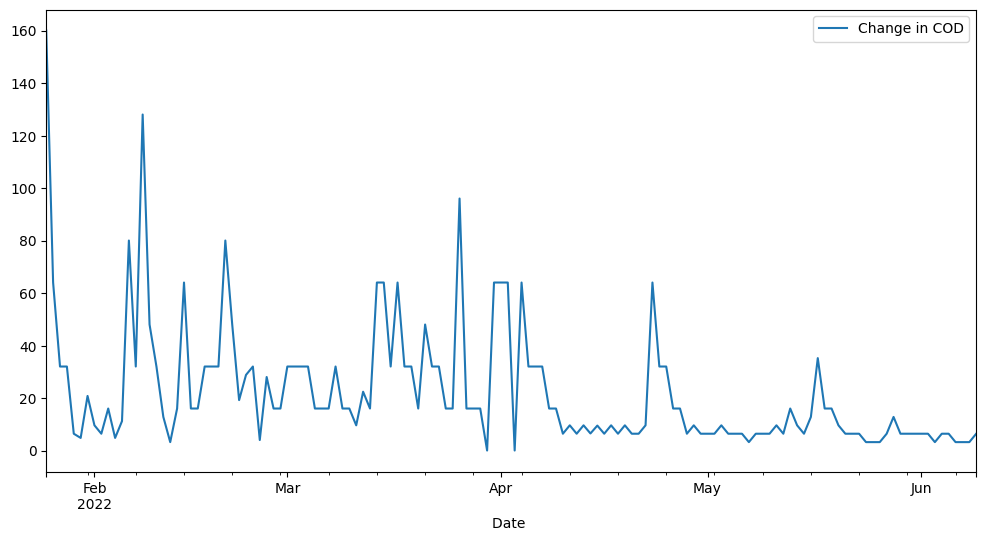

In [ ]:
train.plot(figsize=(12,6))

In [ ]:
print(test)

            Change in COD  Prediction
Date                                 
2022-06-10            6.4    9.383433
2022-06-11            6.4   11.086475
2022-06-12            6.4   12.326959
2022-06-13            3.2   13.077434
2022-06-14            3.2   13.471582
2022-06-15           16.0   13.641453
2022-06-16           16.0   13.903632
2022-06-17           16.0   14.177452
2022-06-18           25.6   14.058862
2022-06-19           67.4   13.521760
2022-06-20           73.4   12.842447
2022-06-21            9.6   12.223601
2022-06-22            9.6   11.562710
2022-06-23            9.6   10.834067
2022-06-24            9.6   10.189044
2022-06-25            9.6    9.707507
2022-06-26            6.4    9.384366
2022-06-27            6.4    9.204845
2022-06-28           35.2    9.175776
2022-06-29            9.6    9.328853
2022-06-30            6.4    9.648186
2022-07-01            3.2   10.069633
2022-07-02            6.4   10.523971
2022-07-03            6.4   10.966414
2022-07-04  

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Change in COD'],test['Prediction']))
print(rmse)

27.20527083250766
